In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airbnb = pd.read_csv('airbnb prices.csv')

In [3]:
airbnb.head(3)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...


In [4]:
airbnb['room_type'].value_counts()

Entire home/apt    14978
Private room        3682
Shared room           63
Name: room_type, dtype: int64

In [11]:
#Dropping Shared rooms because of their low volume
airbnb=airbnb[airbnb['room_type'] != 'Shared room']

In [6]:
# Shared Room is dropped
airbnb['room_type'].value_counts()

Entire home/apt    14978
Private room        3682
Name: room_type, dtype: int64

In [12]:
# It shows where the most popular neighborhood also it is saying near which neighborhood most of the rooms are situated
# We can do analysis like the most preferred neighborhood or near which neighborhood most of the visitor coming
# or whether having a particular type of neighborhood helps you get better rent or reviews or rating etc.
airbnb['neighborhood'].value_counts()

De Baarsjes / Oud West                    3280
De Pijp / Rivierenbuurt                   2371
Centrum West                              2217
Centrum Oost                              1724
Westerpark                                1424
Noord-West / Noord-Midden                 1416
Oud Oost                                  1167
Bos en Lommer                              985
Oostelijk Havengebied / Indische Buurt     916
Watergraafsmeer                            515
Oud Noord                                  492
Ijburg / Eiland Zeeburg                    378
Slotervaart                                346
Buitenveldert / Zuidas                     248
Noord West                                 241
Noord Oost                                 221
Geuzenveld / Slotermeer                    192
Osdorp                                     161
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             98
Bijlmer Oost                                97
Gaasperdam / 

In [14]:
airbnb['reviews'].value_counts().sort_values()

463       1
369       1
385       1
433       1
188       1
       ... 
4       924
3      1100
2      1238
1      1500
0      2975
Name: reviews, Length: 283, dtype: int64

In [16]:
airbnb.overall_satisfaction.value_counts()

5.0    7697
0.0    5721
4.5    4543
4.0     573
3.5     105
3.0      19
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

In [12]:
#Finding those properties where overall_satisfaction is zero and exploring them

In [18]:
airbnb_0_satisfaction=airbnb[airbnb.overall_satisfaction == 0]

In [14]:
airbnb_0_satisfaction.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,5.721000e+03,5721.0,5.721000e+03,0.0,0.0,5721.000000,5721.0,5721.000000,5721.000000,0.0,5721.000000,0.0,5721.000000,5721.000000
mean,1.472219e+07,1476.0,4.674155e+07,NaN,NaN,0.700926,0.0,3.024821,1.554623,NaN,175.620696,NaN,52.364361,4.889534
std,5.209774e+06,0.0,4.424869e+07,NaN,NaN,0.814133,0.0,1.352056,0.949345,NaN,140.020220,NaN,0.015795,0.036742
min,2.542800e+04,1476.0,2.234000e+03,NaN,NaN,0.000000,0.0,1.000000,0.000000,NaN,22.000000,NaN,52.296200,4.771083
25%,1.150164e+07,1476.0,9.749992e+06,NaN,NaN,0.000000,0.0,2.000000,1.000000,NaN,114.000000,NaN,52.353951,4.862918
50%,1.643578e+07,1476.0,2.962380e+07,NaN,NaN,0.000000,0.0,2.000000,1.000000,NaN,150.000000,NaN,52.363567,4.886634
75%,1.917347e+07,1476.0,7.652614e+07,NaN,NaN,1.000000,0.0,4.000000,2.000000,NaN,209.000000,NaN,52.374183,4.909861
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,5.000000,0.0,16.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.013075


In [24]:
airbnb[airbnb.accommodates == 3]['overall_satisfaction'].value_counts()

5.0    621
0.0    483
4.5    411
4.0     56
3.5      8
3.0      4
Name: overall_satisfaction, dtype: int64

In [16]:
airbnb[airbnb.bedrooms ==2].overall_satisfaction.value_counts()

5.0    1787
0.0    1487
4.5    1033
4.0     127
3.5      16
3.0       6
Name: overall_satisfaction, dtype: int64

In [31]:
# Rating based on the price range
airbnb[(airbnb.price >= 150) & (airbnb.price <=180)].overall_satisfaction.value_counts()

5.0    1634
0.0    1169
4.5     881
4.0     104
3.5      12
3.0       4
Name: overall_satisfaction, dtype: int64

In [18]:
# Based on above exploration, inserting overall satisfaction value of 4 where it is missing
airbnb_imputed_satisfaction = airbnb

In [19]:
# Imputing the value 4 in overall satisfaction where the value is present as 0
airbnb_imputed_satisfaction.overall_satisfaction = airbnb_imputed_satisfaction.overall_satisfaction.replace(0,4)

In [20]:
airbnb_imputed_satisfaction.overall_satisfaction.value_counts()

5.0    7697
4.0    6294
4.5    4543
3.5     105
3.0      19
1.0       1
2.5       1
Name: overall_satisfaction, dtype: int64

In [21]:
airbnb.overall_satisfaction.value_counts()

5.0    7697
4.0    6294
4.5    4543
3.5     105
3.0      19
1.0       1
2.5       1
Name: overall_satisfaction, dtype: int64

In [22]:
airbnb.accommodates.value_counts()

2     9996
4     5563
3     1583
6      475
5      470
1      355
8      105
7       52
16      18
10      16
12       9
9        8
14       6
11       2
13       1
17       1
Name: accommodates, dtype: int64

In [23]:
airbnb.price.value_counts()

119.0     1023
180.0      999
144.0      886
150.0      621
132.0      587
108.0      561
96.0       518
114.0      509
118.0      508
240.0      495
156.0      455
102.0      428
90.0       403
168.0      394
300.0      379
95.0       338
210.0      319
84.0       292
162.0      280
179.0      272
192.0      267
138.0      266
216.0      234
107.0      229
143.0      206
78.0       190
270.0      189
72.0       188
126.0      184
174.0      180
          ... 
310.0        1
762.0        1
451.0        1
398.0        1
755.0        1
339.0        1
279.0        1
482.0        1
445.0        1
467.0        1
392.0        1
417.0        1
366.0        1
344.0        1
416.0        1
373.0        1
406.0        1
22.0         1
534.0        1
1170.0       1
492.0        1
1078.0       1
502.0        1
367.0        1
1428.0       1
1016.0       1
328.0        1
1134.0       1
585.0        1
413.0        1
Name: price, Length: 419, dtype: int64

In [24]:
import numpy as np

In [33]:
airbnb.bedrooms.value_counts()/airbnb.bedrooms.count()

1.0     0.591533
2.0     0.238800
3.0     0.077385
0.0     0.061844
4.0     0.025348
5.0     0.003323
6.0     0.001018
10.0    0.000268
7.0     0.000214
8.0     0.000161
9.0     0.000107
Name: bedrooms, dtype: float64

In [26]:
# Dropping values where bedrooms are equal to zero
airbnb = airbnb[airbnb.bedrooms != 0]

In [27]:
#Values without zero bedrooms
airbnb.bedrooms.value_counts()

1.0     11038
2.0      4456
3.0      1444
4.0       473
5.0        62
6.0        19
10.0        5
7.0         4
8.0         3
9.0         2
Name: bedrooms, dtype: int64

In [28]:
#values with zero bedrooms
airbnb.bedrooms.value_counts()

1.0     11038
2.0      4456
3.0      1444
4.0       473
5.0        62
6.0        19
10.0        5
7.0         4
8.0         3
9.0         2
Name: bedrooms, dtype: int64

In [29]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17506 entries, 33 to 18722
Data columns (total 20 columns):
room_id                 17506 non-null int64
survey_id               17506 non-null int64
host_id                 17506 non-null int64
room_type               17506 non-null object
country                 0 non-null float64
city                    17506 non-null object
borough                 0 non-null float64
neighborhood            17506 non-null object
reviews                 17506 non-null int64
overall_satisfaction    17506 non-null float64
accommodates            17506 non-null int64
bedrooms                17506 non-null float64
bathrooms               0 non-null float64
price                   17506 non-null float64
minstay                 0 non-null float64
name                    17460 non-null object
last_modified           17506 non-null object
latitude                17506 non-null float64
longitude               17506 non-null float64
location                1750

In [30]:
airbnb.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1.750600e+04,17506.0,1.750600e+04,0.0,0.0,17506.000000,17506.000000,17506.000000,17506.000000,0.0,17506.000000,0.0,17506.000000,17506.000000
mean,1.108287e+07,1476.0,3.509582e+07,NaN,NaN,16.368959,4.531932,2.960642,1.526220,NaN,169.137267,NaN,52.365207,4.888416
std,6.080450e+06,0.0,3.710345e+07,NaN,NaN,32.796906,0.441955,1.333545,0.825627,NaN,111.009236,NaN,0.015112,0.034722
min,2.818000e+03,1476.0,2.234000e+03,NaN,NaN,0.000000,1.000000,1.000000,1.000000,NaN,12.000000,NaN,52.296200,4.763264
25%,5.923722e+06,1476.0,7.004309e+06,NaN,NaN,2.000000,4.000000,2.000000,1.000000,NaN,113.000000,NaN,52.355178,4.863899
50%,1.210997e+07,1476.0,1.956281e+07,NaN,NaN,6.000000,4.500000,2.000000,1.000000,NaN,144.000000,NaN,52.364507,4.885528
75%,1.643984e+07,1476.0,5.089235e+07,NaN,NaN,17.000000,5.000000,4.000000,2.000000,NaN,196.000000,NaN,52.374604,4.907448
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,532.000000,5.000000,17.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.027689


# Data Visualization

In [31]:
airbnb.head(2)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,4.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...


In [36]:
airbnb['reviews'].value_counts()

0      2975
1      1500
2      1238
3      1100
4       924
       ... 
166       1
405       1
309       1
277       1
463       1
Name: reviews, Length: 283, dtype: int64

(array([7737., 3407., 2068., 1318.,  892.,  619.,  447.,  344.,  247.,
         211.,  167.,  122.,  101.,   87.,   91.,   62.,   57.,   53.,
          49.,   63.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

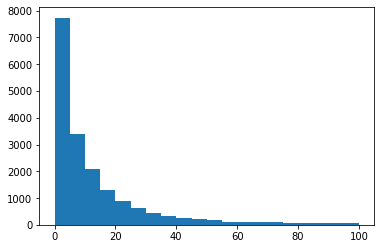

In [34]:
#airbnb.reviews.plot(kind = 'hist')
plt.hist(airbnb['reviews'],bins=20,range=(0,100))

(array([1.950e+02, 3.139e+03, 6.539e+03, 4.481e+03, 2.043e+03, 7.860e+02,
        6.460e+02, 3.180e+02, 1.580e+02, 1.570e+02, 6.300e+01, 3.800e+01,
        1.100e+01, 1.600e+01, 2.000e+01, 1.200e+01, 6.000e+00, 1.000e+00,
        5.000e+00, 3.000e+00]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

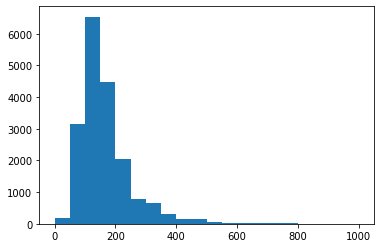

In [37]:
plt.hist(airbnb.price,bins=20,range=(0,1000))

(array([3.250e+02, 9.105e+03, 1.489e+03, 5.437e+03, 4.640e+02, 4.710e+02,
        5.200e+01, 1.050e+02, 8.000e+00, 1.500e+01, 2.000e+00, 8.000e+00,
        0.000e+00, 6.000e+00, 0.000e+00, 1.900e+01]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17.]),
 <a list of 16 Patch objects>)

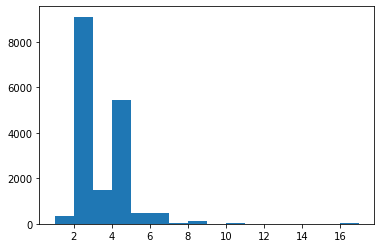

In [34]:
plt.hist(airbnb.accommodates,bins=16)

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.500e+01,
        9.500e+01, 5.902e+03, 4.226e+03, 7.266e+03]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

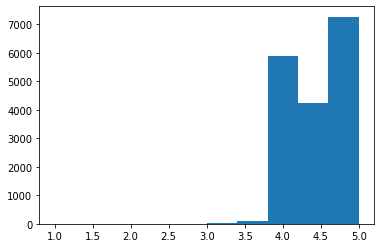

In [35]:
plt.hist(airbnb.overall_satisfaction)

(array([   6.,    0.,   43.,    0.,    0., 3291.,    0., 2489.,    0.,
        4401.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 10 Patch objects>)

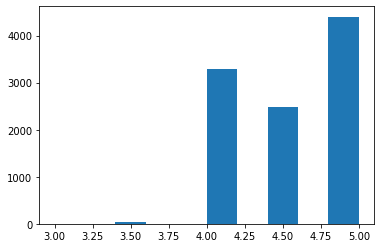

In [36]:
plt.hist(airbnb[(airbnb.price >= 100) & (airbnb.price <= 200)].overall_satisfaction)

(array([ 2.,  0.,  0., 78.,  0.,  0., 61.,  0.,  0., 46.]),
 array([3.5 , 3.65, 3.8 , 3.95, 4.1 , 4.25, 4.4 , 4.55, 4.7 , 4.85, 5.  ]),
 <a list of 10 Patch objects>)

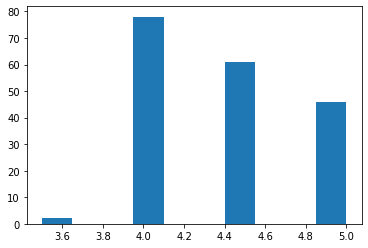

In [37]:
plt.hist(airbnb[airbnb.price < 50].overall_satisfaction)

(array([1.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.700e+01, 0.000e+00,
        1.550e+03, 0.000e+00, 7.850e+02, 1.874e+03]),
 array([2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <a list of 10 Patch objects>)

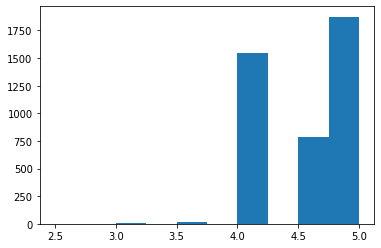

In [38]:
plt.hist(airbnb[airbnb.price > 200].overall_satisfaction)

(array([  1.,   0.,   0.,   0.,   5.,   0., 402.,   0., 198., 481.]),
 array([2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <a list of 10 Patch objects>)

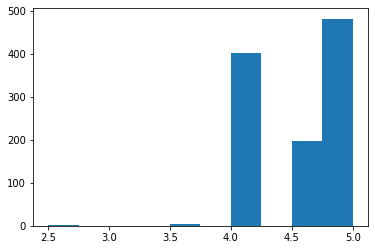

In [39]:
plt.hist(airbnb[airbnb.price > 300].overall_satisfaction)

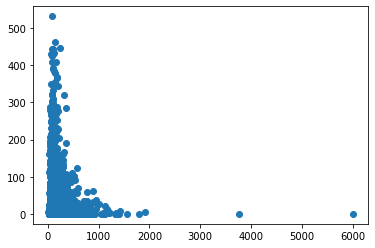

In [40]:
plt.scatter(airbnb.price, airbnb.reviews)

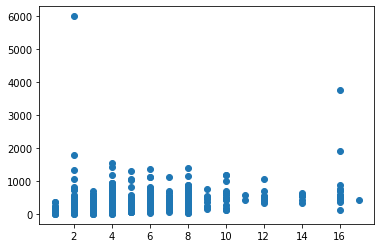

In [41]:
plt.scatter(airbnb.accommodates,airbnb.price)

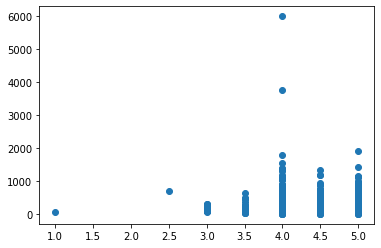

In [42]:
plt.scatter(airbnb.overall_satisfaction,airbnb.price)

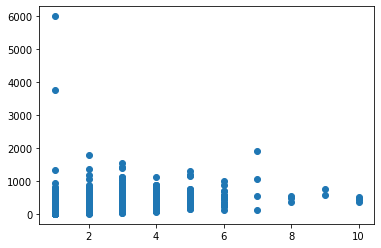

In [43]:
plt.scatter(airbnb.bedrooms,airbnb.price)

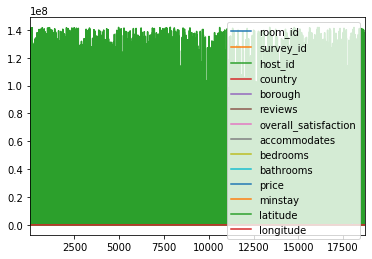

In [44]:
airbnb.plot()

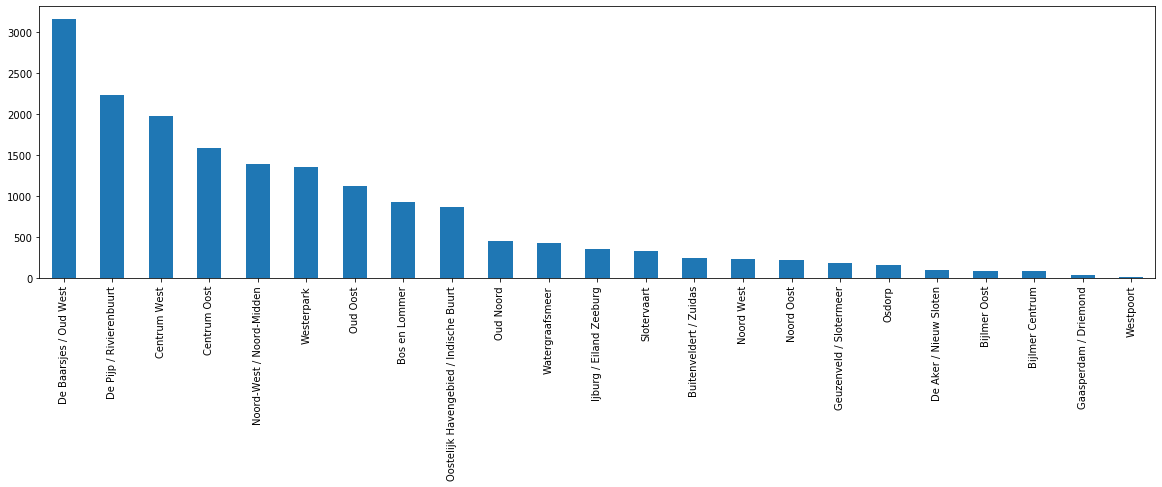

In [45]:
#Plotting neighborhood count
airbnb.neighborhood.value_counts().plot(kind='bar',%%filegsize=(20,5))

airbnb.neighborhood.value_counts().plot(kind='barh')

In [46]:
# Removing rows which are above Price range of 1500
airbnb[airbnb.price > 1500].count()
airbnb = airbnb[airbnb.price <1500]

In [47]:
airbnb.price.value_counts()

180.0     961
119.0     948
144.0     819
150.0     583
132.0     549
108.0     502
240.0     487
114.0     469
96.0      455
118.0     452
156.0     430
168.0     381
102.0     378
300.0     371
90.0      368
210.0     316
95.0      305
84.0      271
179.0     262
162.0     259
192.0     256
138.0     243
216.0     231
107.0     212
143.0     189
270.0     187
78.0      175
72.0      174
126.0     170
174.0     165
         ... 
521.0       1
443.0       1
366.0       1
1199.0      1
507.0       1
373.0       1
406.0       1
444.0       1
1078.0      1
1016.0      1
1134.0      1
467.0       1
301.0       1
1050.0      1
328.0       1
567.0       1
337.0       1
398.0       1
451.0       1
457.0       1
23.0        1
310.0       1
29.0        1
1386.0      1
1319.0      1
659.0       1
371.0       1
416.0       1
756.0       1
413.0       1
Name: price, Length: 413, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [50]:
X.head()

NameError: name 'X' is not defined

In [60]:
airbnb.head(2)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,4.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...


In [56]:
X = airbnb.iloc[:,[8,9,10,11,]]

In [63]:
Y = airbnb.price

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X.values,Y.values,test_size = .3,random_state=1)

In [66]:
lm = LinearRegression()

In [67]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_pred = lm.predict(X_test)

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [70]:
mean_absolute_error(y_test,y_pred)

49.760048108236774

In [71]:
np.sqrt(mean_squared_error(y_test,y_pred))

77.0308769078892

In [72]:
lm.coef_

array([-0.15730951, 13.06118553, 26.17337276, 29.26738688])

In [73]:
print(lm.score)

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [74]:
r2_score(y_test,y_pred)

0.3555865319381407

In [75]:
# Using one hot encoding to transform categorical values

In [76]:
airbnb.head(2)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,4.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...


In [77]:
# Because one hot encoding only takes numerical value, first need to convert the label into numeric and then use 
# one hot encoding

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
le = LabelEncoder()

In [80]:
airbnb['room_type'] = le.fit_transform(airbnb['room_type'])

In [81]:
airbnb['neighborhood'] = le.fit_transform(airbnb['neighborhood'])

In [82]:
airbnb.head(2)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,0,NaN,Amsterdam,NaN,11,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,3119298,1476,15847782,0,NaN,Amsterdam,NaN,21,1,4.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...


In [83]:
# Above we have converted the lables, now we'll use one hot encoding to create new variables

In [84]:
from sklearn.preprocessing import OneHotEncoder

In [85]:
ohc = OneHotEncoder(categorical_features=[0,1])

In [86]:
X1 = airbnb.iloc[:,[3,7,8,9,10,11]]

In [87]:
X1.head(2)

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms
33,0,11,19,5.0,8,4.0
34,0,21,1,4.0,8,3.0


In [88]:
X1 = ohc.fit_transform(X1).toarray()

C:\Users\abagarwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\abagarwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [89]:
X1

array([[1. , 0. , 0. , ..., 5. , 8. , 4. ],
       [1. , 0. , 0. , ..., 4. , 8. , 3. ],
       [1. , 0. , 0. , ..., 5. , 4. , 3. ],
       ...,
       [0. , 1. , 0. , ..., 4. , 1. , 1. ],
       [0. , 1. , 0. , ..., 4.5, 2. , 1. ],
       [0. , 1. , 0. , ..., 4.5, 2. , 1. ]])

In [90]:
Y1 = airbnb.price

In [91]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1.values,test_size=.3,random_state=3)

In [92]:
lm1 = LinearRegression()

In [93]:
lm1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
y1_pred = lm1.predict(X1_test)

In [95]:
r2_score(y1_test,y1_pred)

0.45014378238653396

In [96]:
mean_absolute_error(y1_test,y1_pred)

45.06464151273021

In [97]:
np.sqrt(mean_squared_error(y1_test,y1_pred))

71.54915621231251

In [98]:
# Creating log linear regression

In [99]:
X_log = airbnb.iloc[:,[3,7,8,9,10,11]]

In [100]:
X_log.head(2)

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms
33,0,11,19,5.0,8,4.0
34,0,21,1,4.0,8,3.0


In [101]:
X_log['reviews'] = np.log10(X_log['reviews']+1)
X_log['accommodates'] = np.log10(X_log['accommodates'])
X_log['bedrooms'] = np.log10(X_log['bedrooms'])

C:\Users\abagarwa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\abagarwa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\abagarwa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [102]:
X_log.head(10)

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms
33,0,11,1.301030,5.0,0.903090,0.602060
34,0,21,0.301030,4.0,0.903090,0.477121
35,0,5,1.041393,5.0,0.602060,0.477121
36,0,20,0.301030,4.0,0.903090,0.477121
37,0,5,0.000000,4.0,0.602060,0.602060
38,0,14,0.477121,4.0,0.602060,0.301030
39,0,8,1.380211,4.5,0.602060,0.602060
40,0,6,0.000000,4.0,0.602060,0.301030
41,0,8,1.255273,4.5,0.602060,0.301030
42,0,4,1.204120,5.0,0.778151,0.602060


In [103]:
X_log = ohc.fit_transform(X_log).toarray()

C:\Users\abagarwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\abagarwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [104]:
xlog_train,xlog_test,ylog_train,ylog_test = train_test_split(X_log,Y.values,test_size=.3,random_state=5)

In [105]:
lm_log = LinearRegression()

In [106]:
lm_log.fit(xlog_train,ylog_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
ylog_pred = lm_log.predict(xlog_test)

In [108]:
r2_score(ylog_test,ylog_pred)

0.3734280548648793

In [109]:
mean_absolute_error(ylog_test,ylog_pred)

47.035993144163015

In [110]:
np.sqrt(mean_squared_error(ylog_test,ylog_pred))

79.67425390092829

In [111]:
xlog_df = pd.DataFrame(X_log)

In [112]:
xlog_df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.301030,5.0,0.903090,0.602060
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.301030,4.0,0.903090,0.477121
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.041393,5.0,0.602060,0.477121
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.301030,4.0,0.903090,0.477121
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.0,0.602060,0.602060
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.477121,4.0,0.602060,0.301030
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.380211,4.5,0.602060,0.602060
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.0,0.602060,0.301030
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.255273,4.5,0.602060,0.301030
9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.204120,5.0,0.778151,0.602060


In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
dt = DecisionTreeRegressor()

In [115]:
dt.fit(xlog_train,ylog_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [116]:
ylog_pred = dt.predict(xlog_test)

In [117]:
mean_absolute_error(ylog_test,ylog_pred)

52.70946154269602

In [118]:
np.sqrt(mean_squared_error(ylog_test,ylog_pred))

90.60194537324536

In [119]:
#Decision tree regression using cirterin as friedman_mse
dt = DecisionTreeRegressor(criterion="friedman_mse")
dt.fit(xlog_train,ylog_train)
ylog_pred = dt.predict(xlog_test)
print(mean_absolute_error(ylog_test,ylog_pred))
print(np.sqrt(mean_squared_error(ylog_test,ylog_pred)))

52.94523707611961
91.01618162337459


In [120]:
#Decision tree regression using cirterion as mae
dt = DecisionTreeRegressor(criterion="mae")
dt.fit(xlog_train,ylog_train)
ylog_pred = dt.predict(xlog_test)
print(mean_absolute_error(ylog_test,ylog_pred))
print(np.sqrt(mean_squared_error(ylog_test,ylog_pred)))

52.348124166825365
88.61729431893679


In [121]:
#Decision tree regression using cirterion as mae using max_depth=3 and min_sample_leaf=5
dt = DecisionTreeRegressor(criterion="mae",max_depth=10,min_samples_leaf=20)
dt.fit(xlog_train,ylog_train)
ylog_pred = dt.predict(xlog_test)
print(mean_absolute_error(ylog_test,ylog_pred))
print(np.sqrt(mean_squared_error(ylog_test,ylog_pred)))

44.93696438773567
79.85195666865407


In [ ]:
# Cross Validation to better understand the accuracy on decision tree

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [150]:
lm= LinearRegression()

In [151]:
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [152]:
scores = cross_val_score(lm, X,Y,cv=10,scoring='neg_mean_absolute_error')

In [154]:
print(-scores)

[162.75865697  61.10659055  46.93939108  37.75342272  37.9775013
  32.13648873  35.29429125  56.83694596  33.75246922  60.76165455]


In [155]:
print(-scores.mean())

56.531741233723736


In [148]:
# Cross Validation to better understand the accuracy on decision tree

In [134]:
from sklearn.model_selection import cross_val_score

In [158]:
dt = DecisionTreeRegressor(criterion="mae",max_depth=10,min_samples_leaf=20)
scores = cross_val_score(dt, X,Y,cv=10,scoring='neg_mean_absolute_error')

In [159]:
print(-scores)

[174.8195317   82.09342857  50.02485714  41.15742857  38.746
  29.88        29.69971429  48.826       32.32657143  52.248     ]


In [160]:
-scores.mean()

57.982153169617376

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
max_depth_range = list(range(1,5))

In [144]:
param_grid = dict(max_depth = max_depth_range)

In [145]:
grid = GridSearchCV(dt, param_grid, cv=10,scoring='neg_mean_absolute_error',return_train_score=False)

In [146]:
grid.fit(X,Y)

C:\Users\abagarwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mae', max_depth=10,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=20,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [147]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

-59.136820753099826
{'max_depth': 4}
DecisionTreeRegressor(criterion='mae', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [122]:
#tyring with Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [123]:
rf = RandomForestRegressor()

In [124]:
rf.fit(xlog_train,ylog_train)

C:\Users\abagarwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [125]:
ylog_pred = rf.predict(xlog_test)

In [126]:
mean_absolute_error(ylog_test,ylog_pred)

49.13658699860956

In [127]:
np.sqrt(mean_squared_error(ylog_test,ylog_pred))

83.41102545906939

In [128]:
rf = RandomForestRegressor(criterion='mae')
rf.fit(xlog_train,ylog_train)
ylog_pred = rf.predict(xlog_test)
mean_absolute_error(ylog_test,ylog_pred)
np.sqrt(mean_squared_error(ylog_test,ylog_pred))

C:\Users\abagarwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


81.94737778398587